In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [3]:
dir = os.getcwd()
rates = pd.read_csv(dir+'/data/rates.csv')

In [6]:
rates.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=275)

In [8]:
rates['계정항목']

0      CD(91일)
1      국고채(3년)
2     국고채(10년)
3    통안증권(91일)
Name: 계정항목, dtype: object

In [9]:
drops = ['통계표', '계정항목', '단위', '변환']
cols = ['cd91', '3y', '10y', '91']
rates.drop(columns=drops, inplace=True)

In [11]:
rates = rates.T

In [12]:
rates.columns = cols

In [14]:
rates = rates[['cd91', '3y', '10y']]

In [15]:
rates.head()

,cd91,3y,10y
2003/01,4.70,4.96,5.43
2003/02,4.54,4.73,5.15
2003/03,4.76,4.78,5.20
2003/04,4.62,4.60,5.03
2003/05,4.39,4.27,4.68


In [18]:
rates['10-3'] = rates['10y'] - rates['3y']
rates['3-91d'] = rates['3y'] - rates['cd91']
rates['10-91d'] = rates['10y'] - rates['cd91']

In [19]:
rates

,cd91,3y,10y,10-3,3-91d,10-91d
2003/01,4.70,4.960,5.430,0.470,0.260,0.730
2003/02,4.54,4.730,5.150,0.420,0.190,0.610
2003/03,4.76,4.780,5.200,0.420,0.020,0.440
2003/04,4.62,4.600,5.030,0.430,-0.020,0.410
2003/05,4.39,4.270,4.680,0.410,-0.120,0.290
...,...,...,...,...,...,...
2025/03,2.84,2.590,2.795,0.205,-0.250,-0.045
2025/04,2.74,2.395,2.658,0.263,-0.345,-0.082
2025/05,2.67,2.331,2.710,0.379,-0.339,0.040
2025/06,2.57,2.441,2.842,0.401,-0.129,0.272


In [21]:
ipi = pd.read_csv(dir+'/data/ipi_cbsi.csv')

In [23]:
ipi['dates'] = ipi['Unnamed: 0']

In [26]:
ipi.drop(columns=['Unnamed: 0'], inplace=True)

In [28]:
ipi.set_index('dates', inplace=True)

In [29]:
ipi.head()

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
dates,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9


In [30]:
temp = ipi.join(rates, how='left')

In [31]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,cd91,3y,10y,10-3,3-91d,10-91d
dates,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,4.54,4.730,5.150,0.420,0.190,0.610
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,4.76,4.780,5.200,0.420,0.020,0.440
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,4.62,4.600,5.030,0.430,-0.020,0.410
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,4.39,4.270,4.680,0.410,-0.120,0.290
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,4.28,4.070,4.460,0.390,-0.210,0.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,2.95,2.611,2.830,0.219,-0.339,-0.120
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,2.84,2.590,2.795,0.205,-0.250,-0.045
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,2.74,2.395,2.658,0.263,-0.345,-0.082


c:\Users\tmdal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


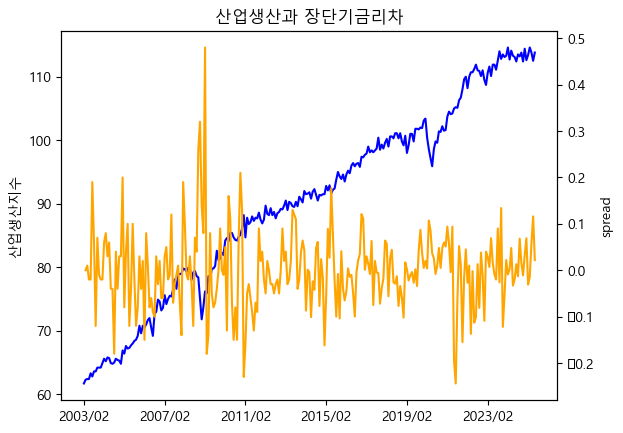

In [68]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = temp.index
y1 = temp['ipi']
y2 = temp['10-3'].diff()

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('spread', color='black')
plt.xticks(x[::48])
plt.title('산업생산과 장단기금리차')
plt.show()

In [70]:
spreads = ['10-3', '3-91d', '10-91d']
results = []
for a in spreads:
    x = sm.add_constant(temp[a])
    y = np.log(temp['ipi'])
    reg = sm.OLS(y, x, missing='drop').fit()
    results.append(reg)
    

In [73]:
print(results[2].summary())

                            OLS Regression Results                            
Dep. Variable:                    ipi   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           2.54e-07
Time:                        02:04:30   Log-Likelihood:                 105.72
No. Observations:                 269   AIC:                            -207.4
Df Residuals:                     267   BIC:                            -200.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5394      0.014    330.161      0.0

In [44]:
spreads = ['10-3', '3-91d', '10-91d']
results = []
for a in spreads:
    x = sm.add_constant(temp[a])
    y = temp['ipi'].pct_change()
    reg = sm.OLS(y, x, missing='drop').fit()
    results.append(reg)
    

In [78]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,3y,10y,10-3,3-91d,10-91d,ipi_cycle,ipi_trend,10-3_cycle,10-3_trend,ipi_bk
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,4.730,5.150,0.420,0.190,0.610,-0.003329,4.125613,NaN,NaN,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,4.780,5.200,0.420,0.020,0.440,-0.001950,4.131627,NaN,NaN,NaN
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,4.600,5.030,0.430,-0.020,0.410,-0.000343,4.129340,NaN,NaN,NaN
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,4.270,4.680,0.410,-0.120,0.290,0.001379,4.125334,NaN,NaN,NaN
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,4.070,4.460,0.390,-0.210,0.180,0.003092,4.135656,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,2.611,2.830,0.219,-0.339,-0.120,-0.011771,4.139671,NaN,NaN,NaN
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,2.590,2.795,0.205,-0.250,-0.045,-0.012566,4.148708,NaN,NaN,NaN
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,2.395,2.658,0.263,-0.345,-0.082,-0.013005,4.139857,NaN,NaN,NaN


In [85]:
x = sm.add_constant(temp['3-91d'].diff())
y = temp['ipi_cycle']
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              ipi_cycle   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     9.920
Date:                Tue, 19 Aug 2025   Prob (F-statistic):            0.00182
Time:                        02:11:18   Log-Likelihood:                 741.41
No. Observations:                 268   AIC:                            -1479.
Df Residuals:                     266   BIC:                            -1472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.278      0.7

In [96]:
for i in np.arange(0,13,3):
    x = sm.add_constant(temp['10-3'].diff()).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.04996747969959936 
 rmse: 0.015161958058359005
lag: 3 
 r-square: 0.07116674153963887 
 rmse: 0.01507633238533514
lag: 6 
 r-square: 0.05588787365001735 
 rmse: 0.01528009192581072
lag: 9 
 r-square: 0.022991937982074218 
 rmse: 0.01561579135235253
lag: 12 
 r-square: 0.004032492733269555 
 rmse: 0.01584605893525988


In [61]:
temp['ipi_cycle'], temp['ipi_trend'] = sm.tsa.filters.cffilter(
    np.log(temp['ipi']), low=18, high=96, drift=True
    )

In [65]:
#전산업생산지수 월간 자료에 bk 필터 적용
temp['ipi_bk'] = sm.tsa.filters.bkfilter(
    np.log(temp['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [97]:
for i in np.arange(0,13,3):
    x = sm.add_constant(temp['10-3']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.1827459470473568 
 rmse: 0.014037621135067296
lag: 3 
 r-square: 0.049275457441164794 
 rmse: 0.015224187115630257
lag: 6 
 r-square: 8.798120798569897e-08 
 rmse: 0.015699731566162858
lag: 9 
 r-square: 0.03191284683282647 
 rmse: 0.015520791601442818
lag: 12 
 r-square: 0.08044166547805542 
 rmse: 0.015198857608108622


In [119]:
temp['test'] = (temp['10-3']**2)

for i in np.arange(0,13,3):
    x = sm.add_constant(temp['test']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.1572615016108012 
 rmse: 0.01425480866757014
lag: 3 
 r-square: 0.03790443545889122 
 rmse: 0.015314959995900705
lag: 6 
 r-square: 0.0006866862552654673 
 rmse: 0.015694340935932104
lag: 9 
 r-square: 0.0394106487378183 
 rmse: 0.015460570772559702
lag: 12 
 r-square: 0.08158071969144676 
 rmse: 0.015189441301034345


In [125]:
cpi = pd.read_csv(dir+'/data/cpi.csv')

In [122]:
cpi.columns

Index(['통계표', '계정항목', '단위', '가중치', '변환', '2003/01', '2003/02', '2003/03',
       '2003/04', '2003/05',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=276)

In [126]:
drops = ['통계표', '계정항목', '단위', '가중치', '변환']
cpi.drop(columns=drops, inplace=True)
cpi = cpi.T
cpi.columns = ['cpi']

In [128]:
temp = temp.join(cpi, how='left')

In [132]:
np.corrcoef(temp['ipi_cycle'], temp['3-91d'])

array([[1.        , 0.01919682],
       [0.01919682, 1.        ]])

In [133]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,10-3,3-91d,10-91d,ipi_cycle,ipi_trend,10-3_cycle,10-3_trend,ipi_bk,test,cpi
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,0.420,0.190,0.610,-0.003329,4.125613,NaN,NaN,NaN,0.176400,69.213
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,0.420,0.020,0.440,-0.001950,4.131627,NaN,NaN,NaN,0.176400,70.034
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,0.430,-0.020,0.410,-0.000343,4.129340,NaN,NaN,NaN,0.184900,69.908
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,0.410,-0.120,0.290,0.001379,4.125334,NaN,NaN,NaN,0.168100,69.782
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,0.390,-0.210,0.180,0.003092,4.135656,NaN,NaN,NaN,0.152100,69.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,0.219,-0.339,-0.120,-0.011771,4.139671,NaN,NaN,NaN,0.047961,116.080
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,0.205,-0.250,-0.045,-0.012566,4.148708,NaN,NaN,NaN,0.042025,116.290
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,0.263,-0.345,-0.082,-0.013005,4.139857,NaN,NaN,NaN,0.069169,116.380


In [ ]:
#2년 롤링 z-score?
rolling_mean = temp['10-3'].rolling(window=24).mean()
rolling_std = temp['10-3'].rolling(window=24).std()
temp['test'] = (temp['10-3'] - rolling_mean) / rolling_std


In [148]:
for i in np.arange(0,13,3):
    x = sm.add_constant(temp['test']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.33888420348409465 
 rmse: 0.013097978663066558
lag: 3 
 r-square: 0.2764199983385285 
 rmse: 0.013717493421376903
lag: 6 
 r-square: 0.13515058491348364 
 rmse: 0.015030703397218887
lag: 9 
 r-square: 0.029123801559277518 
 rmse: 0.015999019351168063
lag: 12 
 r-square: 1.776446673718013e-05 
 rmse: 0.016337975484185446
